In [4]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [5]:

import warnings
warnings.filterwarnings(action='ignore')

plt.rc("font", family = "NanumGothic")
plt.rc("axes", unicode_minus=False)

In [6]:


df_raw = pd.read_csv("data/df_model .csv")
     


In [7]:
df_raw

,Date,rate_delay,rate_female,rate_2030s,target
0,2021-01-01,0.024611,0.560233,0.664508,1303250.0
1,2021-01-02,0.037942,0.604011,0.604011,22230200.0
2,2021-01-03,0.000000,0.794872,0.512821,10492740.0
3,2021-01-04,0.038515,0.625058,0.670534,18678110.0
4,2021-01-05,0.025445,0.592875,0.676845,19482900.0
...,...,...,...,...,...
1090,2023-12-27,0.040787,0.579024,0.756009,NaN
1091,2023-12-28,0.026260,0.606813,0.665720,NaN
1092,2023-12-29,0.032045,0.592837,0.715363,NaN
1093,2023-12-30,0.000000,0.606383,0.680851,NaN


In [8]:
df_raw.isnull().sum()

Date             0
rate_delay       0
rate_female      0
rate_2030s       0
target         365
dtype: int64

In [9]:
df_raw = df_raw.drop(labels='Date', axis=1)
df_prediction = df_raw.tail(365)
df_raw = df_raw.iloc[:-365]
df_prediction

,rate_delay,rate_female,rate_2030s,target
730,0.047312,0.605376,0.754301,NaN
731,0.040286,0.589973,0.696509,NaN
732,0.065312,0.620464,0.648041,NaN
733,0.026718,0.628499,0.685751,NaN
734,0.042598,0.562849,0.675978,NaN
...,...,...,...,...
1090,0.040787,0.579024,0.756009,NaN
1091,0.026260,0.606813,0.665720,NaN
1092,0.032045,0.592837,0.715363,NaN
1093,0.000000,0.606383,0.680851,NaN


In [10]:
df_raw

,rate_delay,rate_female,rate_2030s,target
0,0.024611,0.560233,0.664508,1303250.0
1,0.037942,0.604011,0.604011,22230200.0
2,0.000000,0.794872,0.512821,10492740.0
3,0.038515,0.625058,0.670534,18678110.0
4,0.025445,0.592875,0.676845,19482900.0
...,...,...,...,...
725,0.035917,0.583176,0.662571,22032270.0
726,0.035055,0.564576,0.736162,22423860.0
727,0.030899,0.594569,0.729401,16659780.0
728,0.051402,0.487150,0.724299,1479180.0


In [11]:
df_raw_dummy = df_raw
df_raw_y = df_raw_dummy["target"]
df_raw_x = df_raw_dummy.drop("target", axis = 1, inplace = False)
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3)

In [12]:
df_train_x

,rate_delay,rate_female,rate_2030s
147,0.020057,0.595989,0.567335
335,0.018767,0.630027,0.647453
148,0.037942,0.604011,0.604011
525,0.035088,0.664327,0.653801
519,0.083333,0.666667,0.562500
...,...,...,...
370,0.055627,0.640362,0.733506
502,0.042573,0.600757,0.672658
366,0.025588,0.589903,0.731674
557,0.023419,0.588603,0.696331


In [13]:
rf_uncustomized = RandomForestRegressor()
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.861
Score on test set: -0.038


In [14]:
rf_uncustomized.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [15]:
train_score = []; test_score = []
# n_estimatos: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score
     

In [16]:

df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.820,-0.074
1,20,0.845,-0.095
2,30,0.851,-0.047
3,40,0.852,-0.069
4,50,0.849,-0.031
5,60,0.860,-0.041
6,70,0.853,-0.045
7,80,0.859,-0.044
8,90,0.863,-0.047
9,100,0.861,-0.032


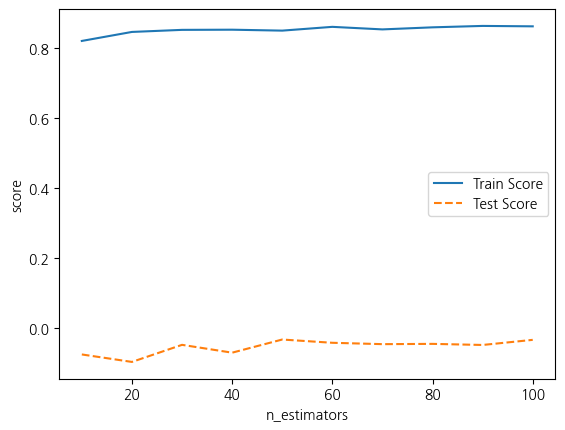

In [17]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

분석의미가 없으므로 나무 수 지정하지 않음.

In [29]:

# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 40)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)
     

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.861,-0.019
1,2,0.741,-0.041
2,3,0.630,0.008
3,4,0.557,0.020
4,5,0.492,0.010
5,6,0.440,0.021
6,7,0.402,0.021
7,8,0.366,0.024
8,9,0.352,0.021
9,10,0.322,0.022


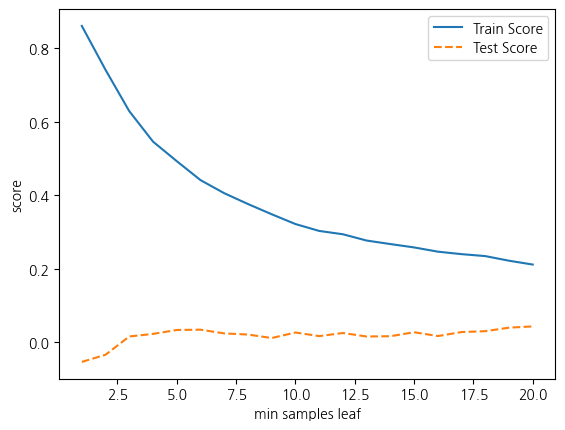

In [22]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()
     

min_samples_leaf: 23

In [31]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분할하기 위한 노드의 최소 자료 수
para_split = [n_split * 2for n_split in range(2, 41)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(min_samples_leaf = 23, min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.200,0.047
1,6,0.198,0.042
2,8,0.200,0.034
3,10,0.198,0.042
4,12,0.196,0.040
5,14,0.198,0.042
6,16,0.202,0.050
7,18,0.197,0.045
8,20,0.197,0.044
9,22,0.200,0.041


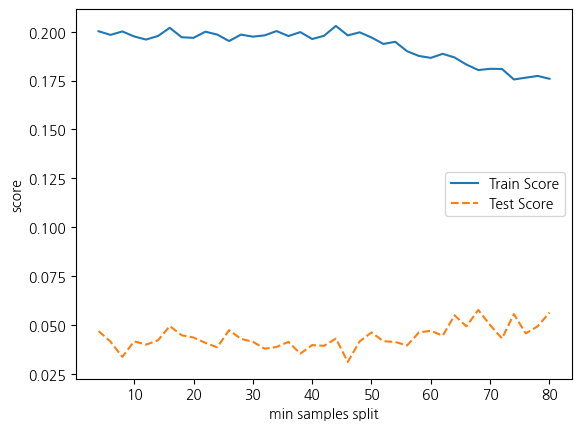

In [32]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

min_samples_split: 16

In [36]:

# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 20)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(min_samples_leaf = 23, min_samples_split = 16, max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.078,0.043
1,2,0.123,0.053
2,3,0.144,0.051
3,4,0.167,0.045
4,5,0.185,0.050
5,6,0.194,0.040
6,7,0.199,0.046
7,8,0.201,0.037
8,9,0.198,0.045
9,10,0.201,0.041


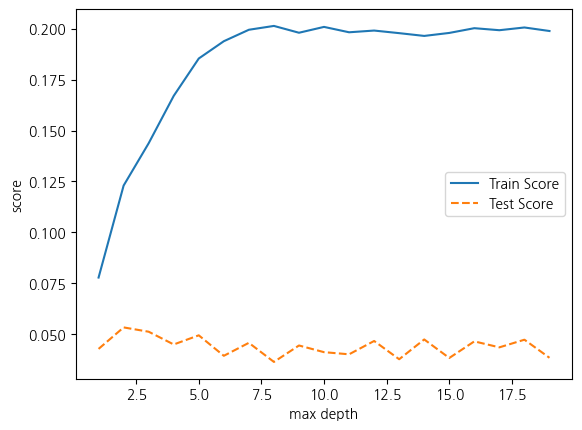

In [37]:


# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()
     


max_depth: 3

In [35]:
rf_final = RandomForestRegressor( min_samples_leaf =23 ,
                                 min_samples_split = 16, max_depth = 3)
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))
     

Score on training set: 0.143
Score on test set: 0.048


그리드 서치 아직안함.

In [38]:





# # GridSearchCV를 이용한 최적 parameter 찾기
# estimator = RandomForestRegressor(random_state=1234)
# # 구하고자 하는 parameter와 범위
# param_grid = {"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}
# # 설명력이 높은 최적 parameter 찾기
# grid_rf = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
# grid_rf.fit(df_train_x, df_train_y)

# print("best estimator model: \n{}".format(grid_rf.best_estimator_))
# print("\nbest parameter: \n{}".format(grid_rf.best_params_))
# print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

KeyboardInterrupt: 